<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong>
<strong><center>Created by Jose Marcial Portilla.</center></strong>
# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set()

-----

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [5]:
y_train.shape , y_test.shape

((50000, 1), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
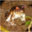

In [7]:
X_train[0]

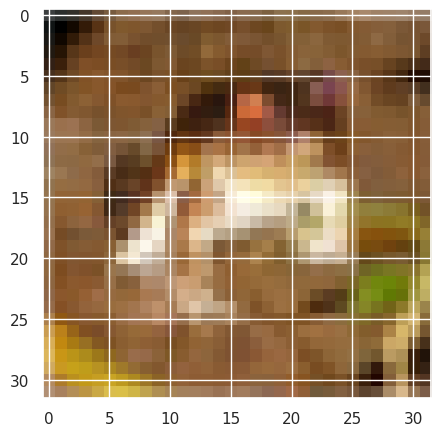

In [12]:
plt.imshow(X_train[0]);

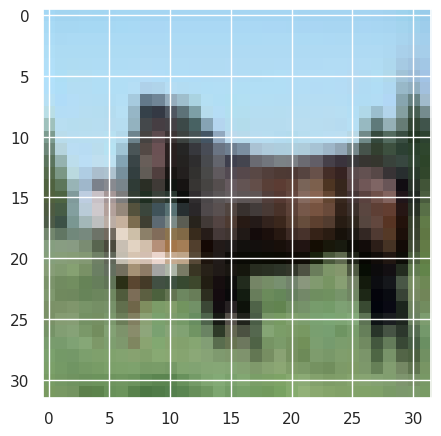

In [13]:
plt.imshow(X_train[12]);

# PreProcessing

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
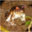

In [14]:
X_train[0]

In [16]:
X_train[0].min() , X_train[0].max() , X_train[0].max() - X_train[0].min()

(np.uint8(0), np.uint8(255), np.uint8(255))

In [17]:
X_train = X_train /255
X_test = X_test / 255

In [18]:
X_train.shape , X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Labels

In [23]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_cat_train = to_categorical(y_train , num_classes= 10)
y_cat_test = to_categorical(y_test , num_classes=10)

----------
# Building the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters = 32 , kernel_size=(4,4) , input_shape = (32,32,3) , activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32 , kernel_size=(4,4) , input_shape = (32,32,3) , activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())



model.add(Dense(256 , activation = "relu"))
model.add(Dense(10 , activation="softmax"))


model.compile(loss = "categorical_crossentropy" ,
              optimizer = "rmsprop" ,
              metrics = ["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor = "val_loss" , patience = 3)

In [34]:
model.fit(X_train ,
          y_cat_train ,
          epochs=15 ,
          validation_data=(X_test , y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.3670 - loss: 1.7441 - val_accuracy: 0.5117 - val_loss: 1.4164
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.5810 - loss: 1.1888 - val_accuracy: 0.5794 - val_loss: 1.1987
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.6460 - loss: 1.0113 - val_accuracy: 0.5374 - val_loss: 1.3665
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6917 - loss: 0.8905 - val_accuracy: 0.6146 - val_loss: 1.1629
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7247 - loss: 0.7996 - val_accuracy: 0.6567 - val_loss: 1.0165
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 60ms/step - accuracy: 0.7498 - loss: 0.7284 - val_accuracy: 0.6825 - val_loss: 0.9485
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7704 - loss: 0.6700 - val_accuracy: 0.6573 - val_loss: 1.1098
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 47ms/step - accuracy: 0.7936 

In [ ]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.45888,1.512933,0.5117,1.416389
1,0.59494,1.154260,0.5794,1.198730
2,0.65318,0.999616,0.5374,1.366522
3,0.69002,0.895166,0.6146,1.162907
4,0.72364,0.806005,0.6567,1.016480


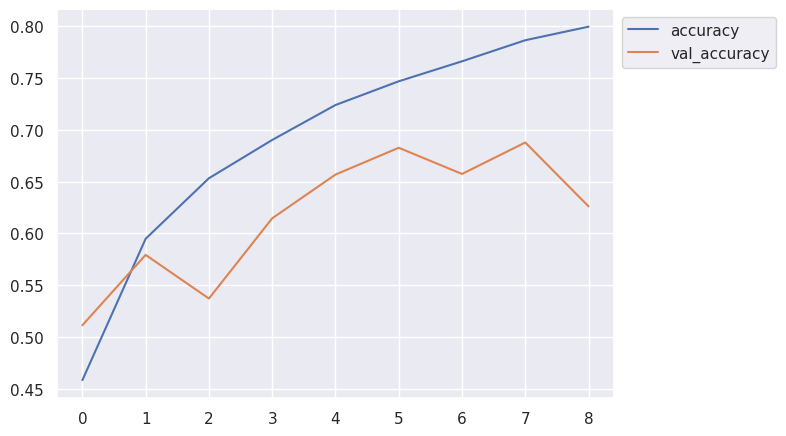

In [38]:
metrics[['accuracy','val_accuracy']].plot()
plt.legend(bbox_to_anchor = (1,1))
plt.show()

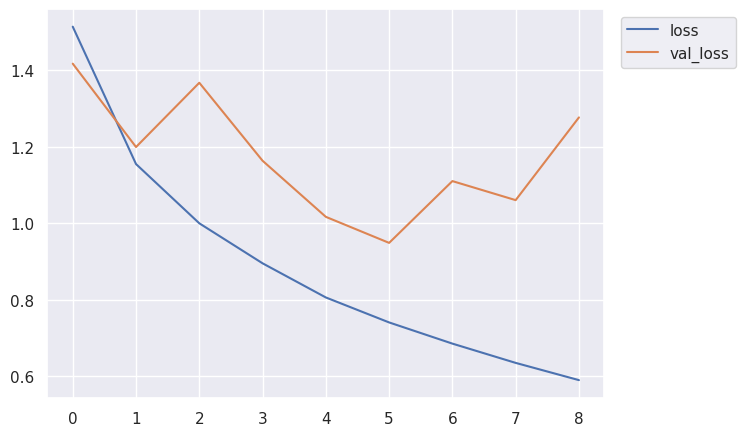

In [42]:
metrics[['loss','val_loss']].plot()
plt.legend(bbox_to_anchor = (1.25,1))
plt.show()

In [47]:
model.metrics_names

['loss', 'compile_metrics']

In [48]:
print(model.metrics_names)
print(model.evaluate(X_test,y_cat_test,verbose=0))

['loss', 'compile_metrics']
[1.2760382890701294, 0.6261000037193298]


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [51]:
predicted_classes = np.argmax(predictions , axis = 1)
print(classification_report(y_test , predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1000
           1       0.74      0.81      0.77      1000
           2       0.63      0.50      0.55      1000
           3       0.54      0.34      0.41      1000
           4       0.68      0.48      0.56      1000
           5       0.68      0.41      0.51      1000
           6       0.41      0.93      0.57      1000
           7       0.81      0.63      0.71      1000
           8       0.77      0.73      0.75      1000
           9       0.60      0.84      0.70      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.62     10000
weighted avg       0.66      0.63      0.62     10000



In [52]:
confusion_matrix(y_test , predicted_classes)

array([[598,  53,  36,  12,  18,   3,  65,   9, 108,  98],
       [  7, 811,   2,   3,   1,   1,  39,   2,  30, 104],
       [ 57,  17, 496,  40,  42,  39, 233,  21,  18,  37],
       [ 10,  21,  57, 335,  49,  91, 335,  24,  17,  61],
       [ 20,  12,  54,  38, 480,  17, 292,  50,  13,  24],
       [ 10,  18,  71, 125,  44, 407, 227,  40,  13,  45],
       [  2,   7,  12,  15,  11,   5, 931,   1,   2,  14],
       [ 22,  12,  39,  36,  60,  32,  80, 628,   4,  87],
       [ 53,  64,  16,   7,   2,   2,  37,   1, 735,  83],
       [ 11,  87,   6,   5,   2,   2,  32,   4,  11, 840]])

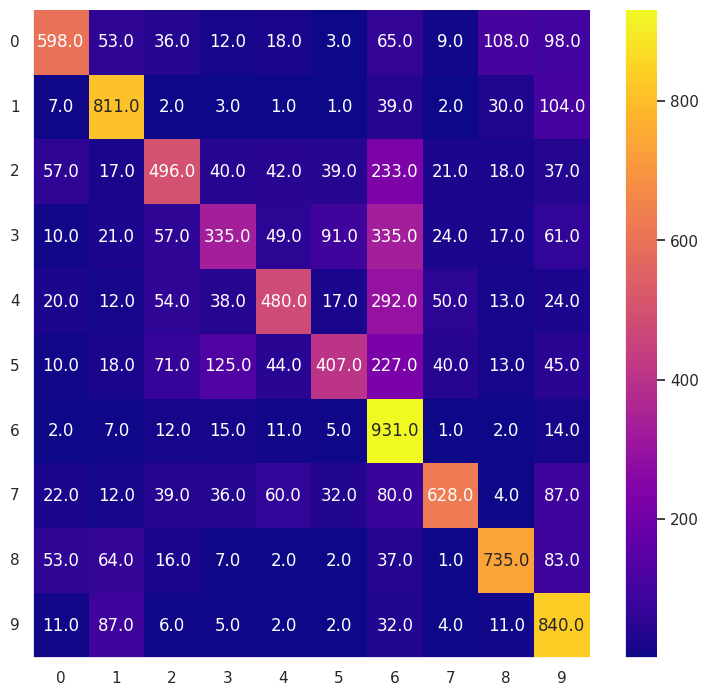

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test , predicted_classes) ,
            vmin = confusion_matrix(y_test , predicted_classes).min() ,
            vmax = confusion_matrix(y_test , predicted_classes).max(),
            annot =True,
            cmap = "plasma",
            fmt =".1f"
            )
plt.yticks(rotation = 0)
sns.despine()

# Predicting a given image

In [68]:
my_image = X_test[16]
my_image.round(2)

array([[[0.37, 0.3 , 0.31],
        [0.36, 0.3 , 0.31],
        [0.35, 0.3 , 0.3 ],
        ...,
        [0.12, 0.11, 0.15],
        [0.69, 0.72, 0.75],
        [0.88, 0.92, 0.94]],

       [[0.35, 0.28, 0.29],
        [0.34, 0.28, 0.28],
        [0.33, 0.28, 0.28],
        ...,
        [0.  , 0.  , 0.05],
        [0.24, 0.25, 0.31],
        [0.65, 0.67, 0.74]],

       [[0.35, 0.27, 0.28],
        [0.33, 0.27, 0.27],
        [0.32, 0.27, 0.27],
        ...,
        [0.02, 0.  , 0.05],
        [0.09, 0.1 , 0.19],
        [0.5 , 0.55, 0.65]],

       ...,

       [[0.8 , 0.69, 0.63],
        [0.84, 0.69, 0.61],
        [0.79, 0.65, 0.61],
        ...,
        [0.71, 0.72, 0.74],
        [0.46, 0.47, 0.49],
        [0.15, 0.13, 0.18]],

       [[0.48, 0.37, 0.35],
        [0.82, 0.67, 0.62],
        [0.83, 0.67, 0.63],
        ...,
        [0.45, 0.45, 0.47],
        [0.17, 0.18, 0.18],
        [0.04, 0.01, 0.06]],

       [[0.4 , 0.33, 0.33],
        [0.82, 0.72, 0.69],
        [0.84, 0

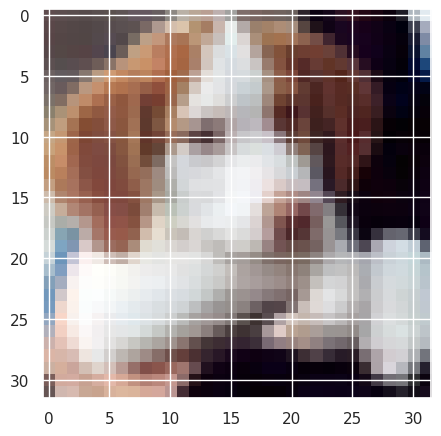

In [65]:
plt.imshow(my_image);

In [67]:
model.predict(my_image.reshape(1,32,32,3)).round(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html